<img heigth="8" src="https://i.imgur.com/BhG5KQ3.png" alt="pbs-enae">

<h1 align="left">Ingesta de Datos con Python</h1>

<h2 align="left"><i>Conectandonos a fuentes externas de datos</i></h2>

<p align="left">
  <h3><a href="https://joefaver.dev">Joseph F. Vergel-Becerra</a> | Introducción a Python - Tools and Skill Courses</h3>
  <br>
  <b>Last updated:</b> <i>03/10/2023</i>
  <br><br>
  <a href="#tabla-de-contenido">Tabla de contenido</a> •
  <a href="#referencias">Referencias</a> •
  <a href="#contribuir">Contribuir</a>
  <br><br>
</p>
<table align="left">
  <td>
    <a href="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000">
      <img src="https://img.shields.io/badge/version-0.1.0-blue.svg?cacheSeconds=2592000" alt="Version" height="18">
    </a>
  </td>
  <td>
    <a href="https://colab.research.google.com/github/joefavergel/pbs-enae-python-beginners-course/blob/main/3-python-data-intake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
    </a>
  </td>
  <td>
    <a href="https://github.com/joefavergel/pbs-enae-python-beginners-course" target="_parent"><img src="https://img.shields.io/github/forks/joefavergel/pbs-enae-python-beginners-course?style=social" alt="Fork"/>
    </a>
  </td>
</table>
<br>
<br>

---

Bienvenid@ al curso interactivo de introducción a `Python`. Ya seas un programador experimentado o no, este curso está destinado a todos los que deseen aprender el lenguaje de programación `Python` desde cero y enfocar su especialización en la ciencia de datos.

<a id='tabla-de-contenido'></a>
## Tabla de contenido
    
<ol>
    <li><a href="#1-preludio"><b>Preludio</b></a></li>
    <li><a href="#2-ingesta-datos"><b>¿En qué consiste la ingesta de datos?</b></a></li>
    <li><a href="#3-carga-manual"><b>Carga manual de datos</b></a></li>
    <ol type="i">
        <li><a href="#i-csv">Desde archivos CSV y Excel</a></li>
        <li><a href="#ii-json">JSON y XML: lectura y parseo</a></li>
        <li><a href="#iii-parquet">Formatos Avanzados: HDF5 y Parquet</a></li>
    </ol>
    <li><a href="#4-conectarse-api"><b>¿Qué es una API web y cómo conectarnos a una?</b></a></li>
    <ol type="i">
        <li><a href="#i-yahoo">Yahoo! Finance's API</a></li>
        <li><a href="#ii-ecommerce-api">Fake Store API</a></li>
    </ol>
    <li><a href="#ejercicios"><b>Ejercicios caso practico: "Ingesta de Datos con Python"</b></a></li>
</ol>

<a id="1-preludio"></a>
## 1. Preludio

In [1]:
import sys
from IPython.core.display import HTML

from pathlib import Path
from packaging import version
import sklearn
import urllib.request


print("[INFO] Este proyecto requiere python 3.9 o superior.")
assert sys.version_info >= (3, 9)
print("[INFO] Versiones verificadas exitosamente!")


def css_styling():
    styles_path = Path(f"./styles/custom.css")
    if not styles_path.is_file():
        Path("styles").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/pbs-enae-python-beginners-course/blob/main/styles/custom.css?raw=true"
        urllib.request.urlretrieve(url, styles_path)

    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)


css_styling()

[INFO] Este proyecto requiere python 3.9 o superior.
[INFO] Versiones verificadas exitosamente!


<a id="2-ingesta-datos"></a>
## 2. ¿En qué consiste la ingesta de datos?

El proceso de importar información desde múltiples fuentes o desde un único sistema de almacenamiento, se conoce como ingesta de datos. Las fuentes de información pueden ser sistemas fisicos locales (*onpremise*) o sistemas informaticos en la nube, como por ejemplo, *data warehouse*, *cloud storage*, APIs (*Application Programming Interface*) o bases de datos. Como los datos tienen diferentes formas y pueden proceder de centenares de fuentes, estos deben ser procesados, limpiados y estructurados, para posteriormente ser transformados y cargados en un formato único. A este procedimiento se le conoce como [Extraer/Transformar/Cargar](https://es.wikipedia.org/wiki/Extract,_transform_and_load) (ETL, por sus siglas en ingles).

Ahora, los mecanismos de ingesta de datos son las herramientas y los procesos que se utilizan para acceder y cargar datos en un sistema o aplicación. Estos mecanismos pueden incluir métodos manuales, como la carga manual de archivos, o métodos automáticos, como las APIs y el *streaming* de datos. La elección del mecanismo adecuado depende del tipo de datos que se desee ingestar, el volumen de datos que se maneje y la complejidad de los sistemas involucrados. En general, los mecanismos de ingesta de datos son esenciales para garantizar que los datos sean precisos, confiables y estén disponibles cuando se necesiten. A continuación, se listan algunos de los mecanismos de ingesta de datos mas utilizados:

- **Carga manual de archivos:** los usuarios pueden cargar archivos en un sistema utilizando una interfaz de usuario para cargar los datos.

- **Extracción de bases de datos:** los datos se extraen directamente de las bases de datos utilizando consultas `SQL` o consultas a bases de datos no relacionales, comopor ejemplo `MongoDB`.

- **API (Application Programming Interface):** los datos se obtienen a través de una API, que proporciona una forma programática de acceder a los datos.

- **Intercambio de archivos:** los archivos se intercambian automáticamente entre sistemas utilizando protocolos de transferencia de archivos, como `FTP` o `SFTP`.

- ***Web scraping:*** los datos se recopilan automáticamente de sitios web utilizando herramientas de web scraping.

- **Streaming de datos:** los datos se transmiten en tiempo real desde dispositivos o sistemas remotos.

- **Integración de sistemas:** los datos se integran entre sistemas utilizando herramientas de integración empresarial como *middleware*.

- **Correo electrónico:** los datos se reciben automáticamente en una dirección de correo electrónico y se procesan automáticamente.

- ***IoT (Internet of Things):*** los dispositivos IoT recopilan y envían datos automáticamente a través de redes inalámbricas.

En esta sesión nos enfocaremos en las APIs, por ser uno de los mecanismos más ampliamente usados en diversos ecosistemas tecnológicos.

<a id="3-carga-manual"></a>
## 3. Carga manual de datos

La "carga manual de datos" se refiere al proceso de **importar datos** desde diferentes fuentes y formatos directamente a un programa o sistema sin el uso de herramientas automatizadas o flujos de trabajo predefinidos. En lugar de depender de conexiones en tiempo real o sistemas de integración automática, en este método, los usuarios seleccionan y cargan archivos o conjuntos de datos específicos de manera intencional. Este proceso es común en análisis de datos, donde los analistas recopilan datos de diversas fuentes, como archivos CSV, Excel, JSON, XML, entre otros, y los cargan en herramientas o lenguajes de programación, como `Python`, para su posterior análisis y procesamiento.

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/PT7XoY6.png" alt="python-interpreter">
  </a><br>
  <b>Figura 1:</b> Carga de datos exportados desde Excel a pandas.
</p><br>

Aunque puede ser menos eficiente que los métodos automatizados para grandes volúmenes de datos o aplicaciones en tiempo real, la carga manual ofrece precisión, control y flexibilidad, permitiendo a los usuarios trabajar con datos específicos según sus necesidades.

Pandas es ampliamente utilizada para la carga de datos. Una de las razones de su popularidad es su amplio conjunto de métodos de entrada/salida (Input/Output o I/O) que facilitan la carga y el almacenamiento de datos en una variedad de formatos. Estos métodos permiten a los usuarios leer datos desde diferentes fuentes, como archivos CSV, Excel, bases de datos SQL, y formatos como JSON o Parquet, y cargarlos en estructuras de datos de Pandas, principalmente **DataFrames**. Del mismo modo, los usuarios pueden guardar fácilmente sus **DataFrames** en estos formatos o exportarlos para su uso en otras herramientas o sistemas.

Por ejemplo, con pandas, cargar un archivo CSV o escribir un `DataFrame` en un archivo Excel es tan simple como usar `read_csv()` o `to_excel()`, respectivamente. Estas funciones ofrecen una amplia gama de parámetros que permiten un control detallado sobre cómo se leen o escriben los datos, como especificar delimitadores, manejar fechas o definir tipos de datos.

<p align="center">
 <a target="_blank">
   <img width="600px" src="https://i.imgur.com/gzQTOBD.png" alt="python-interpreter">
 </a><br>
  <b>Figura 2:</b> Metodos Inputo/Output (I/O) de pandas.
</p><br>

En resumen, los métodos I/O simplifican y estandarizan la forma en que los analistas y científicos de datos interactúan con diferentes formatos y fuentes de datos, permitiéndoles centrarse en el análisis y procesamiento de los datos en lugar de en los detalles técnicos de la ingesta y exportación.

<a id="i-csv"></a>
### A. Desde archivos CSV y Excel

El método más común para la ingesta de datos en Python es a través de archivos CSV o Excel, gracias a la biblioteca pandas.

Ahroa descargaremos un dataset de prueba. A continuación, la siguiente celda verifica la existencia del archivo original de datos y si no ha sido descargado, creará el directorio, descargará el archivo y lo descomprimirá. Al contar con los datos, el primer paso es enmarcar el problema al que nos enfrentaremos.

<div class="remark">
<b>Importate:</b> Por el momento no se preocupe por dominio de los datasets, el tipo de informacion o el contexto de la misma. La diea principal es aprender a utilizar <code>pandas</code>.
</div>

In [2]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "bigquery-geotab-intersection-congestion"
DATA_PATH = f"datasets/{DATASET}/"


def load_traffic_congestion_data(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_traffic_congestion_data(dataset=DATASET)

[INFO] Dataset 'bigquery-geotab-intersection-congestion' downloaded and uncompressed correctly!


Una vez se nos ha tenemos la información, analicemos con qué archivos contamos y de qué tipo. De esta manera intentaremos responder estas preguntas claves.

Utilicemos la biblioteca [`os`](https://docs.python.org/es/3.10/library/os.html) del *core* de `python`, que en términos generales nos permite ejecutar funcionalidades propias del sistema operativo (OS: *Operative System*). Nos interesa visualizar los archivos presentes en directorio y podremos hacerlo desde `jupyter` con tan solo ejecutar la siguiente celda:

In [3]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/bigquery-geotab-intersection-congestion/":

['submission_metric_map', 'BigQuery-Dataset-Access.md', 'test.csv', 'train.csv', 'submission_metric_map.json', 'sample_submission.csv']


En la anterior salida de celda (*output*), vemos que contamos con `'test.csv'` y `'train.csv'`. Estos dos archivos son precisamente los que contienen la información principal.<br><br>

<div class="tip">
    <b>Tip:</b> <i>Los archivos CSV (del inglés comma-separated values) son un tipo de documento en formato abierto sencillo para representar datos en forma de tabla.⁴</i> Muchas de las bases de datos modernas permiten exportar datos en el formato CSV, por lo que es muy usual solicitarlos y/o recibirlos de esta manera.
</div><br>

In [4]:
import os
import pandas as pd

train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
train

RowId  IntersectionId   Latitude  Longitude  \
0       1921357               0  33.791659 -84.430032   
1       1921358               0  33.791659 -84.430032   
2       1921359               0  33.791659 -84.430032   
3       1921360               0  33.791659 -84.430032   
4       1921361               0  33.791659 -84.430032   
...         ...             ...        ...        ...   
856382  2777739            1990  39.938232 -75.149930   
856383  2777740            1990  39.938232 -75.149930   
856384  2777741            1990  39.938232 -75.149930   
856385  2777742            1990  39.938232 -75.149930   
856386  2777743            1990  39.938232 -75.149930   

                     EntryStreetName                ExitStreetName  \
0       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
1       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
2       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
3       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
4       Marietta Boulevard Northwest  Marietta Boulevard Northwest   
...                              ...                           ...   
856382              South 4th Street              Catharine Street   
856383              South 4th Street              South 4th Street   
856384              South 4th Street              South 4th Street   
856385              Catharine Street              Catharine Street   
856386              South 4th Street              South 4th Street   

       EntryHeading ExitHeading  Hour  Weekend  ...  TimeFromFirstStop_p40  \
0                NW          NW     0        0  ...                    0.0   
1                SE          SE     0        0  ...                    0.0   
2                NW          NW     1        0  ...                    0.0   
3                SE          SE     1        0  ...                    0.0   
4                NW          NW     2        0  ...                    0.0   
...             ...         ...   ...      ...  ...                    ...   
856382            S           W    17        1  ...                    0.0   
856383            S           S    18        1  ...                    0.0   
856384            S           S    19        1  ...                    0.0   
856385            W           W    20        1  ...                    0.0   
856386            S           S    23        1  ...                    0.0   

       TimeFromFirstStop_p50  TimeFromFirstStop_p60  TimeFromFirstStop_p80  \
0                        0.0                    0.0                    0.0   
1                        0.0                    0.0                    0.0   
2                        0.0                    0.0                    0.0   
3                        0.0                    0.0                    0.0   
4                        0.0                    0.0                    0.0   
...                      ...                    ...                    ...   
856382                   0.0                    0.0                   55.0   
856383                   0.0                    0.0                    0.0   
856384                   0.0                    0.0                    0.0   
856385                   0.0                    0.0                    0.0   
856386                   0.0                    0.0                    0.0   

        DistanceToFirstStop_p20  DistanceToFirstStop_p40  \
0                           0.0                      0.0   
1                           0.0                      0.0   
2                           0.0                      0.0   
3                           0.0                      0.0   
4                           0.0                      0.0   
...                         ...                      ...   
856382                      0.0                      0.0   
856383                      0.0                      0.0   
856384                      0.0                      0.0   
856385    

In [5]:
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Training dataset dimnesions (rows, cols): {train.shape}")
    display(train.head())

[INFO] Training dataset dimnesions (rows, cols): (856387, 28)


RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  Month  \
0          NW     0        0      6   
1          SE     0        0      6   
2          NW     1        0      6   
3          SE     1        0      6   
4          NW     2        0      6   

                                                Path  TotalTimeStopped_p20  \
0  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   
1  Marietta Boulevard Northwest_SE_Marietta Boule...                   0.0   
2  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   
3  Marietta Boulevard Northwest_SE_Marietta Boule...                   0.0   
4  Marietta Boulevard Northwest_NW_Marietta Boule...                   0.0   

   TotalTimeStopped_p40  TotalTimeStopped_p50  TotalTimeStopped_p60  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   TotalTimeStopped_p80  TimeFromFirstStop_p20  TimeFromFirstStop_p40  \
0                   0.0                    0.0                    0.0   
1                   0.0                    0.0                    0.0   
2                   0.0                    0.0                    0.0   
3                   0.0                    0.0                    0.0   
4                   0.0                    0.0                    0.0   

   TimeFromFirstStop_p50  TimeFromFirstStop_p60  TimeFromFirstStop_p80  \
0                    0.0                    0.0                    0.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   DistanceToFirstStop_p20  DistanceToFirstStop_p40  DistanceToFirstStop_p50  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   DistanceToFirstStop_p60  DistanceToFirstStop_p80     City  
0                      0.0                      0.0  Atlanta  
1                      0.0                      0.0  Atlanta  
2                      0.0                      0.0  Atlanta  
3                      0.0                      0.0  Atlanta  
4                      0.0                      0.0  Atlanta

In [6]:
test = pd.read_csv(os.path.join(DATA_PATH, "test.csv"))
with pd.option_context('display.max_columns', None):
    print(f"[INFO] Testing dataset dimnesions (rows, cols): {test.shape}")
    display(test.head())

[INFO] Testing dataset dimnesions (rows, cols): (1921357, 13)


RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0  Peachtree Street Southwest           NE          NE     0        0      6   
1   Mitchell Street Southwest           SW          SE     0        0      6   
2  Peachtree Street Southwest           SW          SW     0        0      6   
3  Peachtree Street Southwest           NE          NE     1        0      6   
4  Peachtree Street Southwest           SW          SW     1        0      6   

                                                Path     City  
0  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
1  Peachtree Street Southwest_SW_Mitchell Street ...  Atlanta  
2  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta  
3  Peachtree Street Southwest_NE_Peachtree Street...  Atlanta  
4  Peachtree Street Southwest_SW_Peachtree Street...  Atlanta

In [7]:
train.head(100).to_csv("datasets/train_sample.csv", index=False)

In [8]:
train.head(100).to_excel("datasets/train_sample.xlsx", index=False)

<a id="ii-json"></a>
### B. JSON y XML: lectura y parseo

JSON es un formato de texto sencillo para el intercambio de datos. Se trata de un subconjunto de la notación literal de objetos de JavaScript, aunque, debido a su amplia adopción como alternativa a XML, se considera un formato independiente del lenguaje. JSON (acrónimo de JavaScript Object Notation, 'notación de objeto de JavaScript') es un formato de texto sencillo para el intercambio de datos.

<p align="center">
 <a target="_blank">
   <img width="700px" src="https://i.imgur.com/M0NhThY.png" alt="python-interpreter">
 </a><br>
  <b>Figura 2:</b> Ejemplo de datos en formato JSON.
</p><br>

JSON y XML son estructuras de datos comunes para la ingesta de datos, especialmente en aplicaciones web.

In [9]:
from pathlib import Path
import urllib.request

JSON_URL = "https://raw.githubusercontent.com/joefavergel/datasets/main/john_smith.json"
DATA_PATH = Path("datasets/john_smith.json")

if not DATA_PATH.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)

try:
    urllib.request.urlretrieve(JSON_URL, DATA_PATH)
    print(f"[INFO] The JSON file was downloaded successfully!")
except Exception as e:
    print(f"[Exception] There's been a problem: {e}")

[INFO] The JSON file was downloaded successfully!


In [10]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH.parent}\":"
    f"\n\n{os.listdir(DATA_PATH.parent)}"
)

[INFO] Los archivos presentes en "datasets":

['.DS_Store', 'btc-close-from-202111-to-202251.png', 'john_smith.json', 'fakestore', 'titanic-dataset', 'btc-bollinger-bands.png', 'train_sample.csv', 'titanic-dataset.zip', 'btc-high-low-prices.png', '_', 'meli_train_data.parquet.zip', 'meli_train_data.parquet', 'readme.md', 'banking-marketing-targets', 'bigquery-geotab-intersection-congestion', 'bigquery-geotab-intersection-congestion.zip', '.ipynb_checkpoints', 'btc-close-typical-price-sma.png', 'api_tests.ipynb', 'banking-marketing-targets.zip', 'train_sample.xlsx']


Despues de la **lectura del archivo JSON**, la conversión y transformación de datos estructurados en formato JSON a una estructura nativa de Python, específicamente un diccionario (dict), es lo que se conoce como **"parsing"**. El **"parseo"** o **"parsing"** se refiere al proceso de analizar una secuencia de símbolos (ya sea en texto natural, código o datos) para determinar su estructura gramatical respecto a una regla o conjunto de reglas específicas. El formato JSON y los diccionarios de Python tienen una similitud estructural, lo que facilita este proceso.

Veamos cómo funciona este proceso paso a paso:

- **Lectura del Archivo:** Se inicia leyendo el contenido del archivo JSON, típicamente como una cadena de texto larga.

- **Análisis de la Cadena:** Utilizando un módulo de Python, como json, se analiza la cadena obtenida en busca de patrones que coincidan con la estructura y sintaxis del JSON.

- **Conversión a Diccionario:** Durante el análisis, el contenido del JSON se convierte y mapea a estructuras de datos de Python. Los objetos en JSON se convierten en diccionarios (dict), los arrays en listas (list), las cadenas en strings (str), los números en tipos numéricos (int o float), true y false en sus equivalentes booleanos True y False, respectivamente, y null se mapea a None.

- **Resultado:** Al final del proceso de parseo, se obtiene un diccionario de Python que representa la estructura y los datos del archivo JSON original.

Carguemos el archivo `john_smith.json`:

In [11]:
import json
from pprint import pprint


with open(DATA_PATH, 'r') as json_file: # Reading
    json_data = json.load(json_file) # Parsing
json_file.close()

pprint(json_data)

{'address': {'city': 'New York',
             'postalCode': '10021-3100',
             'state': 'NY',
             'streetAddress': '21 2nd Street'},
 'age': 27,
 'children': [],
 'firstName': 'John',
 'isAlive': 'true',
 'lastName': 'Smith',
 'phoneNumbers': [{'number': '212 555-1234', 'type': 'home'},
                  {'number': '646 555-4567', 'type': 'office'}],
 'spouse': None}


In [12]:
print(type(json_data))

<class 'dict'>


In [13]:
json_data['address']['city']

'New York'

In [14]:
json_data['phoneNumbers'][1]['type']

'office'

<a id="iii-parquet"></a>
### C. Formatos Avanzados: Parquet y HDF5

Estos formatos son útiles para manejar grandes volúmenes de datos, ofreciendo compresión y acceso eficiente.

In [15]:
from pathlib import Path
from zipfile import ZipFile
import urllib.request

DATASET = "meli_train_data.parquet"
DATA_PATH = f"datasets/{DATASET}/"


def load_dataset(dataset: str):
    zipfile_path = Path(f"datasets/{dataset}.zip")
    if not zipfile_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = f"https://github.com/joefavergel/datasets/blob/main/{dataset}.zip?raw=true"
        urllib.request.urlretrieve(url, zipfile_path)
    Path(f"datasets/{dataset}").mkdir(parents=True, exist_ok=True)
    try:
        ZipFile(zipfile_path).extractall(f"datasets/{dataset}")
        print(f"[INFO] Dataset \'{dataset}\' downloaded and uncompressed correctly!")
    except Exception as e:
        print(f"[Exception] There's been a problem: {e}")


load_dataset(dataset=DATASET)

[INFO] Dataset 'meli_train_data.parquet' downloaded and uncompressed correctly!


In [16]:
import os

print(
    f"[INFO] Los archivos presentes en \"{DATA_PATH}\":"
    f"\n\n{os.listdir(DATA_PATH)}"
)

[INFO] Los archivos presentes en "datasets/meli_train_data.parquet/":

['meli_train_data.parquet']


In [17]:
!pip install pyarrow fastparquet

In [19]:
import os
import pandas as pd

DATASET = "meli_train_data.parquet"
DATA_PATH = f"datasets/{DATASET}/"

data = pd.read_parquet(os.path.join(DATA_PATH, DATASET))
data.head()

In [ ]:
print(f"[INFO] Dimensions of dataset (Rows, Cols): {data.shape}")
data

<a id="4-conectarse-api"></a>
## 4. ¿Qué es una API web y cómo conectarnos a una?

Las API son mecanismos que permiten a dos componentes de software comunicarse entre sí mediante un conjunto de definiciones y protocolos. Por ejemplo, el sistema de software del instituto de meteorología contiene datos meteorológicos diarios. La aplicación meteorológica de su teléfono “habla” con este sistema a través de las API y le muestra las actualizaciones meteorológicas diarias en su teléfono.

> *Las Interfaces de Programacion de Aplicaciones (APIs por sus siglas en inglés) son construcciones disponibles en los lenguajes de programación que permiten a los desarrolladores crear funcionalidades complejas de una manera simple. Estas abstraen el código más complejo para proveer una sintaxis más fácil de usar en su lugar. Como ejemplo, piensa en el suministro de electricidad de tu casa, apartamento, o cualquier otro edificio. Si quieres usar un electrodoméstico, simplemente lo conectas en un enchufe y funciona. No intentas conectarlo directamente a la fuente de alimentación — hacerlo sería muy ineficiente y, si no eres electricista, dificil y peligroso.*

Retomando ideas anteriores, si quisieras programar gráficos 3D, sería mucho más facil hacerlo usando una API escrita en un lenguaje de alto nivel como `Python`, en lugar de intentar escribir código de bajo nivel (por ejemplo: `C` o `C++`) que controle directamente la GPU del equipo u otras funciones gráficas.

La arquitectura de las API suele explicarse en términos de **cliente** y **servidor**. La aplicación que envía la solicitud se llama **cliente**, y la que envía la respuesta se llama **servidor** (Ver Figura 1). En el ejemplo del tiempo, la base de datos meteorológicos del instituto es el servidor y la aplicación móvil es el cliente.

<p align="center">
  <a target="_blank">
    <img width="500px" src="https://i.imgur.com/wpZKuSW.png" alt="python-interpreter">
  </a><br>
  <b>Figura 1:</b> Arquitectura basica de una API.
</p><br>



**¿Qué tipos de APIs existen?**

Las API pueden funcionar de cuatro maneras diferentes y suelen asociarse como tipos:

- **API de SOAP:** Estas API utilizan el protocolo simple de acceso a objetos. El cliente y el servidor intercambian mensajes mediante XML. Se trata de una API menos flexible que era más popular en el pasado.

- **API de RPC:** Estas API se denominan llamadas a procedimientos remotos. El cliente completa una función (o procedimiento) en el servidor, y el servidor devuelve el resultado al cliente.

- **API de WebSocket:** La API de WebSocket es otro desarrollo moderno de la API web que utiliza objetos JSON para transmitir datos. La API de WebSocket admite la comunicación bidireccional entre las aplicaciones cliente y el servidor. El servidor puede enviar mensajes de devolución de llamada a los clientes conectados, por lo que es más eficiente que la API de REST.

- **API de REST:** Estas son las API más populares y flexibles que se encuentran en la web actualmente. El cliente envía las solicitudes al servidor como datos. El servidor utiliza esta entrada del cliente para iniciar funciones internas y devuelve los datos de salida al cliente.



**Cómo conectarse a un API REST**

Para conectarse a una API web tipo REST, tenemos diversas opciones, a continuacion se xponen las dos mas sencillas:

- **A través de una biblioteca tipo cliente por protocolo HTTP/HTTPS:** En lugar de programar un HTTP módulo de solicitud desde cero, los desarrolladores confían en varias bibliotecas de solicitudes HTTP de `Python`. Algunas de estas son `requests`, `httpx` y `http.client`.

- **A través de una biblioteca o un kit de desarrollo de software (SDK):** La forma mas facil de consumir una API es utilizando una biblioteca o un SDK especialmente disendo para conectarse a la API y realizar consultas. A continuacion utilizaremos la biblioteca `yfinance` para conectarnos a la API de [Yahoo! Finance](https://finance.yahoo.com/).


<a id="i-yahoo"></a>
### A. Yahoo! Finance's API"

La forma más fácil de consumir una API es utilizando una biblioteca o un Kit de desarrollo de software especialmente diseñado para conectarse a la API y realizar consultas.

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/foHjiKi.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="600px" src="https://i.imgur.com/QIGR1fq.png" alt="python-interpreter">
  </a><br>
</p><br>

In [20]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.6/65.6 kB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
  Using cached html5lib-1.1-py2.py3-none-any.whl (112 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 928.0/928.0 kB 3.7 MB/s eta 0:00:003.8 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.5/502.5 kB 5.6 MB/s eta 0:00:005.9 MB/s eta 0:00:01
  Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.16.3-py3-none-any.whl size=135501 sha256=371ce19e719d826bf129e13175aa306a4839d03457d0c704123f0d3690d7b2fa
  Stored in directory: /Users/joefaver/Library/Caches/pip/wheels/46/c8/76/da8e4e28595d45fac70db742390350ab43211d5ae4b0eb376c
Successfully built peewee
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninsta

In [21]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf


tsla = yf.Ticker("TSLA")

start_date, end_date = '2022-01-01', datetime.now().strftime('%Y-%m-%d')
tsla_hist = tsla.history(start=start_date, end=end_date)

with pd.option_context('display.max_columns', None):
    print(f"[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): {tsla_hist.shape}")
    print(
        "[INFO] Time window of Tesla stocks dataset (min, max): "
        f"({tsla_hist.index.min()}, {tsla_hist.index.max()})"
    )
    display(tsla_hist)

[INFO] Tesla stocks historical dataset (TSLA) dimensions (rows, cols): (441, 7)
[INFO] Time window of Tesla stocks dataset (min, max): (2022-01-03 00:00:00-05:00, 2023-10-04 00:00:00-04:00)


Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  382.583344  400.356659  378.679993  399.926666   
2022-01-04 00:00:00-05:00  396.516663  402.666656  374.350006  383.196655   
2022-01-05 00:00:00-05:00  382.216675  390.113342  360.336670  362.706665   
2022-01-06 00:00:00-05:00  359.000000  362.666656  340.166656  354.899994   
2022-01-07 00:00:00-05:00  360.123322  360.309998  336.666656  342.320007   
...                               ...         ...         ...         ...   
2023-09-28 00:00:00-04:00  240.020004  247.550003  238.649994  246.380005   
2023-09-29 00:00:00-04:00  250.000000  254.770004  246.350006  250.220001   
2023-10-02 00:00:00-04:00  244.809998  254.279999  242.619995  251.600006   
2023-10-03 00:00:00-04:00  248.610001  250.020004  244.449997  246.529999   
2023-10-04 00:00:00-04:00  248.139999  261.859985  247.600006  261.160004   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  103931400        0.0           0.0  
2022-01-04 00:00:00-05:00  100248300        0.0           0.0  
2022-01-05 00:00:00-05:00   80119800        0.0           0.0  
2022-01-06 00:00:00-05:00   90336600        0.0           0.0  
2022-01-07 00:00:00-05:00   84164700        0.0           0.0  
...                              ...        ...           ...  
2023-09-28 00:00:00-04:00  117058900        0.0           0.0  
2023-09-29 00:00:00-04:00  128346200        0.0           0.0  
2023-10-02 00:00:00-04:00  123810400        0.0           0.0  
2023-10-03 00:00:00-04:00  101985300        0.0           0.0  
2023-10-04 00:00:00-04:00  129411800        0.0           0.0  

[441 rows x 7 columns]

In [22]:
tsla_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 441 entries, 2022-01-03 00:00:00-05:00 to 2023-10-04 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          441 non-null    float64
 1   High          441 non-null    float64
 2   Low           441 non-null    float64
 3   Close         441 non-null    float64
 4   Volume        441 non-null    int64  
 5   Dividends     441 non-null    float64
 6   Stock Splits  441 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 27.6 KB


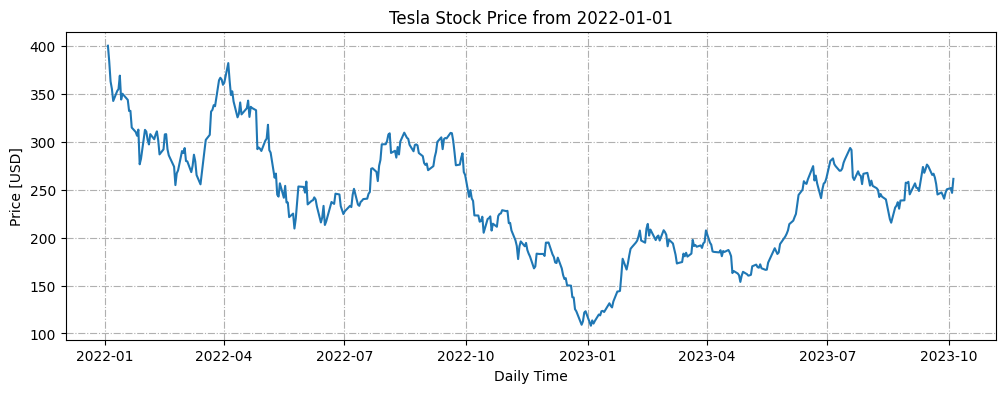

In [23]:
plt.figure(figsize=(12,4))
plt.plot(tsla_hist["Close"])
plt.grid(linestyle='-.')
plt.title(f"Tesla Stock Price from {start_date}")
plt.xlabel("Daily Time")
plt.ylabel("Price [USD]")
plt.show()

In [24]:
def plot_stock_feature(
    data: pd.DataFrame,
    stock: dict,
    feature: str,
    ax: plt.Axes,
    show: bool = None
) -> plt.Axes:
    ax.plot(data[feature])
    ax.grid(linestyle='-.')
    ax.set_title(f"{stock['name']} ({stock['ticker']}) Stock Price")
    ax.set_xlabel("Daily Time")
    ax.set_ylabel("Price [USD]")
    if show:
        plt.show()
    return ax

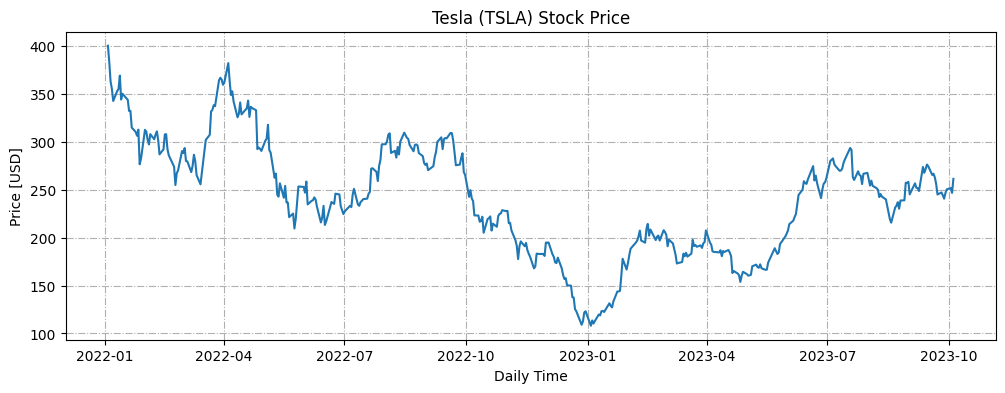

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_stock_feature(
    data=tsla_hist,
    stock={"name": "Tesla", "ticker": "TSLA"},
    feature="Close",
    ax=ax,
    show=True
)

In [26]:
def get_stock_data(stock: dict, start_date: str, end_date: str):
    stock = yf.Ticker(stock["ticker"])
    data = stock.history(start=start_date, end=end_date)
    return data


get_stock_data(
    stock={"name": "Apple", "ticker": "AAPL"}, start_date=start_date, end_date=end_date
)

Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  176.052746  181.052279  175.933951  180.190964   
2022-01-04 00:00:00-05:00  180.804793  181.111693  177.329863  177.904068   
2022-01-05 00:00:00-05:00  177.814944  178.369344  172.894614  173.171814   
2022-01-06 00:00:00-05:00  170.974022  173.548044  169.924618  170.281021   
2022-01-07 00:00:00-05:00  171.162116  172.399623  169.320704  170.449310   
...                               ...         ...         ...         ...   
2023-09-28 00:00:00-04:00  169.339996  172.029999  167.619995  170.690002   
2023-09-29 00:00:00-04:00  172.020004  173.070007  170.339996  171.210007   
2023-10-02 00:00:00-04:00  171.220001  174.300003  170.929993  173.750000   
2023-10-03 00:00:00-04:00  172.259995  173.630005  170.820007  172.399994   
2023-10-04 00:00:00-04:00  171.089996  174.210007  170.970001  173.660004   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  104487900        0.0           0.0  
2022-01-04 00:00:00-05:00   99310400        0.0           0.0  
2022-01-05 00:00:00-05:00   94537600        0.0           0.0  
2022-01-06 00:00:00-05:00   96904000        0.0           0.0  
2022-01-07 00:00:00-05:00   86709100        0.0           0.0  
...                              ...        ...           ...  
2023-09-28 00:00:00-04:00   56294400        0.0           0.0  
2023-09-29 00:00:00-04:00   51814200        0.0           0.0  
2023-10-02 00:00:00-04:00   52164500        0.0           0.0  
2023-10-03 00:00:00-04:00   49594600        0.0           0.0  
2023-10-04 00:00:00-04:00   52963300        0.0           0.0  

[441 rows x 7 columns]

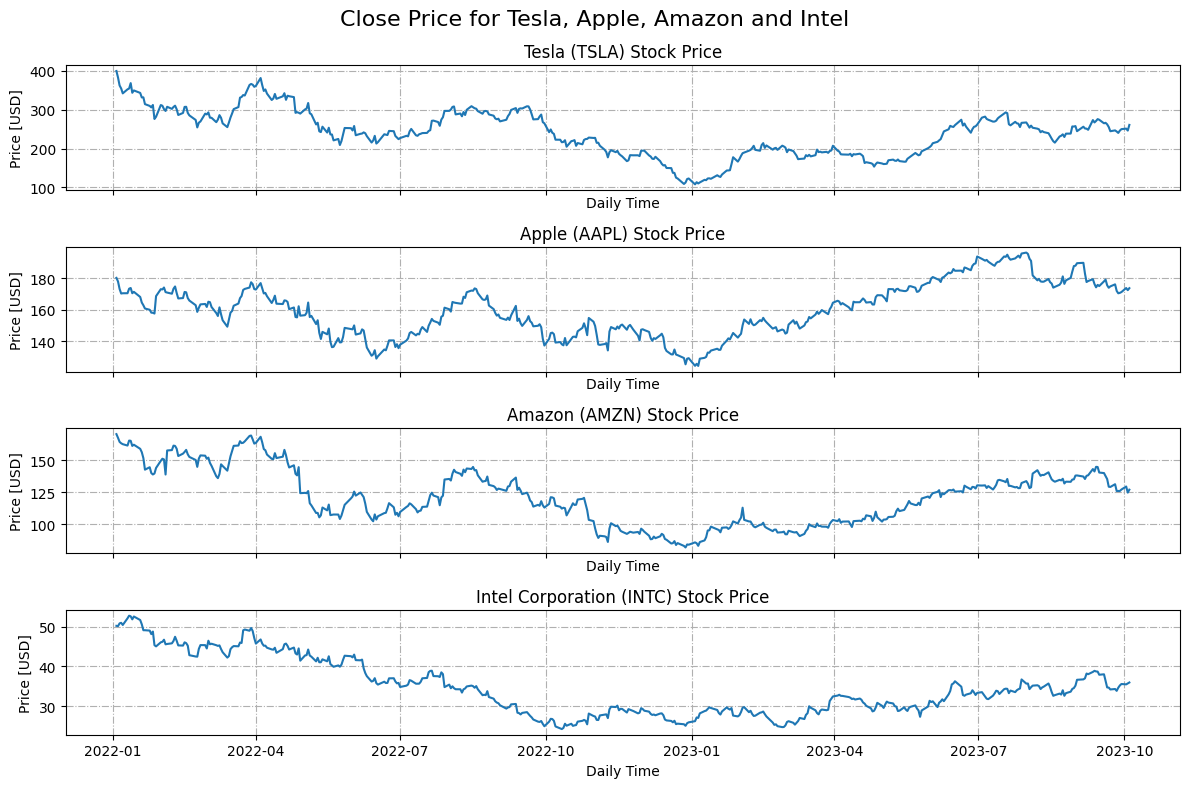

In [27]:
stocks = [
    {"name": "Tesla", "ticker": "TSLA"},
    {"name": "Apple", "ticker": "AAPL"},
    {"name": "Amazon", "ticker": "AMZN"},
    {"name": "Intel Corporation", "ticker": "INTC"},
]

datasets = {}
fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
for index, stock in enumerate(stocks):
    data = get_stock_data(stock=stock, start_date=start_date, end_date=end_date)
    axes[index] = plot_stock_feature(
        data=data,
        stock=stock,
        feature="Close",
        ax=axes[index],
        show=False
    )
    datasets[stock["ticker"]] = data
fig.suptitle("Close Price for Tesla, Apple, Amazon and Intel", fontsize=16)
plt.tight_layout()
plt.show()


In [28]:
datasets["AAPL"]

Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  176.052761  181.052294  175.933965  180.190979   
2022-01-04 00:00:00-05:00  180.804778  181.111677  177.329848  177.904053   
2022-01-05 00:00:00-05:00  177.814959  178.369360  172.894629  173.171829   
2022-01-06 00:00:00-05:00  170.974007  173.548028  169.924603  170.281006   
2022-01-07 00:00:00-05:00  171.162116  172.399623  169.320704  170.449310   
...                               ...         ...         ...         ...   
2023-09-28 00:00:00-04:00  169.339996  172.029999  167.619995  170.690002   
2023-09-29 00:00:00-04:00  172.020004  173.070007  170.339996  171.210007   
2023-10-02 00:00:00-04:00  171.220001  174.300003  170.929993  173.750000   
2023-10-03 00:00:00-04:00  172.259995  173.630005  170.820007  172.399994   
2023-10-04 00:00:00-04:00  171.089996  174.210007  170.970001  173.660004   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-01-03 00:00:00-05:00  104487900        0.0           0.0  
2022-01-04 00:00:00-05:00   99310400        0.0           0.0  
2022-01-05 00:00:00-05:00   94537600        0.0           0.0  
2022-01-06 00:00:00-05:00   96904000        0.0           0.0  
2022-01-07 00:00:00-05:00   86709100        0.0           0.0  
...                              ...        ...           ...  
2023-09-28 00:00:00-04:00   56294400        0.0           0.0  
2023-09-29 00:00:00-04:00   51814200        0.0           0.0  
2023-10-02 00:00:00-04:00   52164500        0.0           0.0  
2023-10-03 00:00:00-04:00   49594600        0.0           0.0  
2023-10-04 00:00:00-04:00   52963300        0.0           0.0  

[441 rows x 7 columns]

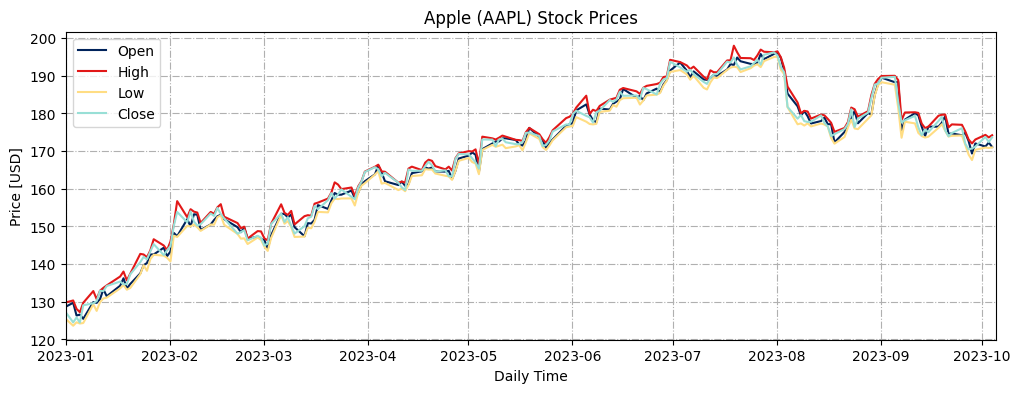

In [29]:
colors = ["#00235B", "#E21818", "#FFDD83", "#98DFD6"]
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)

for index, feature in enumerate(["Open", "High", "Low", "Close"]):
    ax.plot(datasets["AAPL"][feature], color=colors[index], label=feature)
    
ax.legend()
ax.grid(linestyle='-.')
ax.set_title("Apple (AAPL) Stock Prices")
ax.set_xlabel("Daily Time")
ax.set_ylabel("Price [USD]")
ax.set_xlim((datetime(2023, 1, 1, 0, 0, 0), datetime.now()))
plt.show()

In [30]:
import plotly.graph_objects as go


fig = go.Figure(
    data=[
        go.Candlestick(x=datasets["AAPL"].index,
        open=datasets["AAPL"]['Open'],
        high=datasets["AAPL"]['High'],
        low=datasets["AAPL"]['Low'],
        close=datasets["AAPL"]['Close'])
    ]
)
fig.show()

In [31]:
def compute_bollinger_bands(
    data: pd.DataFrame, width: int = 2, window: int = 5, min_periods: int = 1
) -> pd.DataFrame():
    sma = data["Close"].rolling(window=window, min_periods=min_periods).mean()
    std = data["Close"].rolling(window=window, min_periods=min_periods).std()

    bb = pd.DataFrame()
    bb['bb_sma'] = sma
    bb['bb_lower'] = bb['bb_sma'] - width * std
    bb['bb_upper'] = bb['bb_sma'] + width * std
    return bb


def plot_bollinger_bands(
    data: pd.DataFrame,
    stock: dict,
    ax: plt.Axes,
    show: bool = None
) -> plt.Axes:
    ax.plot(data["bb_sma"], color="#00235B", label="SMA")
    ax.fill_between(
        x=data.index,
        y2=data["bb_lower"],
        y1=data["bb_upper"], 
        alpha=0.3,
        linewidth=2,
        color="#576CBC",
        label="Bollinger Bands"
    )

    ax.legend()
    ax.grid(linestyle='--')
    ax.set_title(f"Bollinger Bands of {stock['name']} ({stock['ticker']}) Stock Price")
    ax.set_xlabel("Daily Time")
    ax.set_ylabel("Price [USD]")
    if show:
        plt.show()
    return ax

In [32]:
features = ["Open", "High", "Low", "Close"]
data_with_bb = data.copy()
data_with_bb = compute_bollinger_bands(
    data=data_with_bb[features], width=2
)
data_with_bb = data[features].merge(
    data_with_bb, how='left', on=data[features].index
).rename(columns={"key_0": "Date"})
data_with_bb.set_index("Date", inplace=True)
data_with_bb

Open       High        Low      Close  \
Date                                                                    
2022-01-03 00:00:00-05:00  48.704833  50.194737  48.657681  50.175877   
2022-01-04 00:00:00-05:00  50.515352  50.864253  49.647814  50.109871   
2022-01-05 00:00:00-05:00  51.099990  52.967086  50.760520  50.798237   
2022-01-06 00:00:00-05:00  51.496045  51.552621  50.373899  50.930256   
2022-01-07 00:00:00-05:00  51.099995  51.288591  50.119300  50.392761   
...                              ...        ...        ...        ...   
2023-09-28 00:00:00-04:00  34.650002  35.660000  34.380001  35.180000   
2023-09-29 00:00:00-04:00  35.650002  35.910000  35.160000  35.549999   
2023-10-02 00:00:00-04:00  35.610001  35.980000  34.980000  35.459999   
2023-10-03 00:00:00-04:00  35.270000  36.540001  35.270000  35.689999   
2023-10-04 00:00:00-04:00  36.520000  36.520000  35.330002  35.930000   

                              bb_sma   bb_lower   bb_upper  
Date                                                        
2022-01-03 00:00:00-05:00  50.175877        NaN        NaN  
2022-01-04 00:00:00-05:00  50.142874  50.049528  50.236220  
2022-01-05 00:00:00-05:00  50.361328  49.601707  51.120949  
2022-01-06 00:00:00-05:00  50.503560  49.661918  51.345202  
2022-01-07 00:00:00-05:00  50.481400  49.745810  51.216990  
...                              ...        ...        ...  
2023-09-28 00:00:00-04:00  34.418001  33.400023  35.435978  
2023-09-29 00:00:00-04:00  34.692001  33.318802  36.065199  
2023-10-02 00:00:00-04:00  34.926000  33.497675  36.354326  
2023-10-03 00:00:00-04:00  35.298000  34.443203  36.152796  
2023-10-04 00:00:00-04:00  35.562000  35.006770  36.117229  

[441 rows x 7 columns]

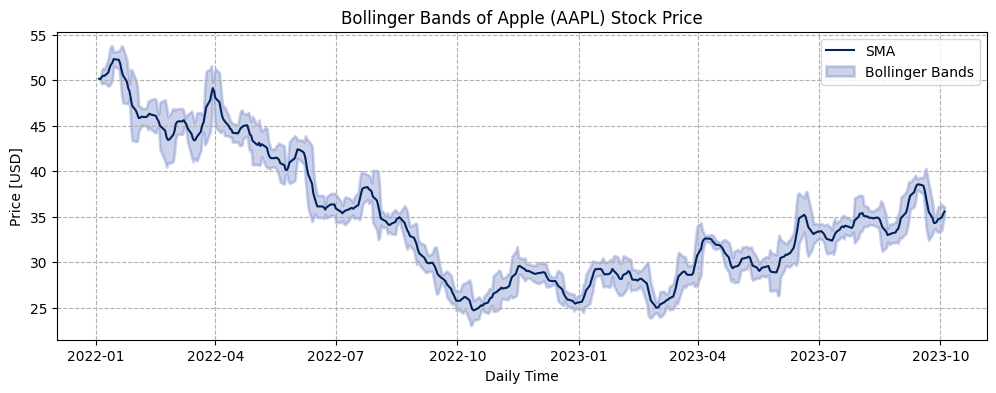

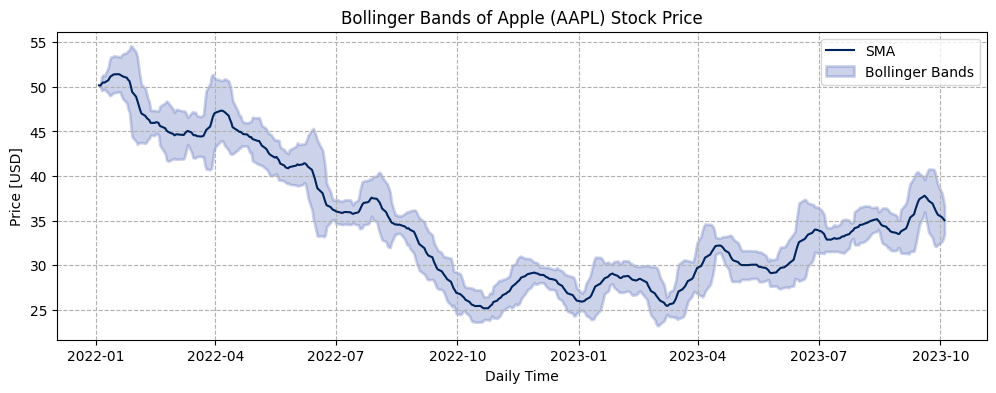

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_bollinger_bands(
    data=data_with_bb,
    stock={"name": "Apple", "ticker": "AAPL"},
    ax=ax,
    show=True
)

features = ["Open", "High", "Low", "Close"]
data_with_bb = data.copy()
data_with_bb = compute_bollinger_bands(
    data=data_with_bb[features], width=2, window=12, min_periods=1
)
data_with_bb = data[features].merge(
    data_with_bb, how='left', on=data[features].index
).rename(columns={"key_0": "Date"})
data_with_bb.set_index("Date", inplace=True)

fig, ax = plt.subplots(1, 1, figsize=(12, 4), sharex=True)
_ = plot_bollinger_bands(
    data=data_with_bb,
    stock={"name": "Apple", "ticker": "AAPL"},
    ax=ax,
    show=True
)

<a id="ii-ecommerce-api"></a>
### B. Fake Store API

[Fake Store API](https://fakestoreapi.com/) es una API publica de uso gratuito que permite desarrollar prototipos de sitio webs de comercio electrónico (*e-commerce*) o compras, bajo un escenario real en el que puede ser consultada información de productos y sus detalles, simulación de carritos de compras o información usuarios sintéticos. Por lo tanto, para este caso utilizaremos la biblioteca cliente `requests` que nos permite realizar consultas `HTTP/HTTPS` a la API de Fake Store. El primer paso será consultar un producto en el catalogo de Fake Store.

In [34]:
import itertools
import json
import os

from io import BytesIO
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from pprint import pprint
import requests
from tqdm.auto import tqdm

tqdm.pandas()


response = requests.get('https://fakestoreapi.com/products/1')
product_data = response.json()
pprint(product_data)

{'category': "men's clothing",
 'description': 'Your perfect pack for everyday use and walks in the forest. '
                'Stash your laptop (up to 15 inches) in the padded sleeve, '
                'your everyday',
 'id': 1,
 'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg',
 'price': 109.95,
 'rating': {'count': 120, 'rate': 3.9},
 'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops'}


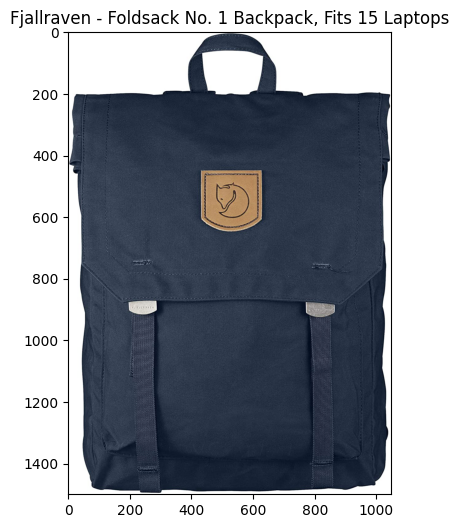

In [35]:
response = requests.get(product_data['image'])
img = Image.open(BytesIO(response.content))
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.title(product_data['title'])
plt.show()

Ahora, crearemos nuestro propio *dataset* a partir de la lista completa de productos que ofrece Fake Store:

In [36]:
DATASET_NAME = "fakestore"
DATASET_PATH = f"datasets/{DATASET_NAME}/"
IMGSET_PATH = os.path.join(DATASET_PATH, "images/")

In [37]:
!mkdir -p $DATASET_PATH
!mkdir -p $IMGSET_PATH

In [38]:
response = requests.get('https://fakestoreapi.com/products/')
products = response.json()
pprint(products)

[{'category': "men's clothing",
  'description': 'Your perfect pack for everyday use and walks in the forest. '
                 'Stash your laptop (up to 15 inches) in the padded sleeve, '
                 'your everyday',
  'id': 1,
  'image': 'https://fakestoreapi.com/img/81fPKd-2AYL._AC_SL1500_.jpg',
  'price': 109.95,
  'rating': {'count': 120, 'rate': 3.9},
  'title': 'Fjallraven - Foldsack No. 1 Backpack, Fits 15 Laptops'},
 {'category': "men's clothing",
  'description': 'Slim-fitting style, contrast raglan long sleeve, '
                 'three-button henley placket, light weight & soft fabric for '
                 'breathable and comfortable wearing. And Solid stitched '
                 'shirts with round neck made for durability and a great fit '
                 'for casual fashion wear and diehard baseball fans. The '
                 'Henley style round neckline includes a three-button placket.',
  'id': 2,
  'image': 'https://fakestoreapi.com/img/71-3HjGNDUL._AC_SY879.

In [39]:
products = pd.DataFrame.from_dict(products)
products

id                                              title   price  \
0    1  Fjallraven - Foldsack No. 1 Backpack, Fits 15 ...  109.95   
1    2             Mens Casual Premium Slim Fit T-Shirts    22.30   
2    3                                 Mens Cotton Jacket   55.99   
3    4                               Mens Casual Slim Fit   15.99   
4    5  John Hardy Women's Legends Naga Gold & Silver ...  695.00   
5    6                       Solid Gold Petite Micropave   168.00   
6    7                         White Gold Plated Princess    9.99   
7    8  Pierced Owl Rose Gold Plated Stainless Steel D...   10.99   
8    9  WD 2TB Elements Portable External Hard Drive -...   64.00   
9   10  SanDisk SSD PLUS 1TB Internal SSD - SATA III 6...  109.00   
10  11  Silicon Power 256GB SSD 3D NAND A55 SLC Cache ...  109.00   
11  12  WD 4TB Gaming Drive Works with Playstation 4 P...  114.00   
12  13  Acer SB220Q bi 21.5 inches Full HD (1920 x 108...  599.00   
13  14  Samsung 49-Inch CHG90 144Hz Curved Gaming Moni...  999.99   
14  15  BIYLACLESEN Women's 3-in-1 Snowboard Jacket Wi...   56.99   
15  16  Lock and Love Women's Removable Hooded Faux Le...   29.95   
16  17  Rain Jacket Women Windbreaker Striped Climbing...   39.99   
17  18        MBJ Women's Solid Short Sleeve Boat Neck V     9.85   
18  19                 Opna Women's Short Sleeve Moisture    7.95   
19  20         DANVOUY Womens T Shirt Casual Cotton Short   12.99   

                                          description          category  \
0   Your perfect pack for everyday use and walks i...    men's clothing   
1   Slim-fitting style, contrast raglan long sleev...    men's clothing   
2   great outerwear jackets for Spring/Autumn/Wint...    men's clothing   
3   The color could be slightly different between ...    men's clothing   
4   From our Legends Collection, the Naga was insp...          jewelery   
5   Satisfaction Guaranteed. Return or exchange an...          jewelery   
6   Classic Created Wedding Engagement Solitaire D...          jewelery   
7   Rose Gold Plated Double Flared Tunnel Plug Ear...          jewelery   
8   USB 3.0 and USB 2.0 Compatibility Fast data tr...       electronics   
9   Easy upgrade for faster boot up, shutdown, app...       electronics   
10  3D NAND flash are applied to deliver high tran...       electronics   
11  Expand your PS4 gaming experience, Play anywhe...       electronics   
12  21. 5 inches Full HD (1920 x 1080) widescreen ...       electronics   
13  49 INCH SUPER ULTRAWIDE 32:9 CURVED GAMING MON...       electronics   
14  Note:The Jackets is US standard size, Please c...  women's clothing   
15  100% POLYURETHANE(shell) 100% POLYESTER(lining...  women's clothing   
16  Lightweight perfet for trip or casual wear---L...  women's clothing   
17  95% RAYON 5% SPANDEX, Made in USA or Imported,...  women's clothing   
18  100% Polyester, Machine wash, 100% cationic po...  women's clothing   
19  95%Cotton,5%Spandex, Features: Casual, Short S...  women's clothing   

                                                image  \
0   https://fakestoreapi.com/img/81fPKd-2AYL._AC_S...   
1   https://fakestoreapi.com/img/71-3HjGNDUL._AC_S...   
2   https://fakestoreapi.com/img/71li-ujtlUL._AC_U...   
3   https://fakestoreapi.com/img/71YXzeOuslL._AC_U...   
4   https://fakestoreapi.com/img/71pWzhdJNwL._AC_U...   
5   https://fakestoreapi.com/img/61sbMiUnoGL._AC_U...   
6   https://fakestoreapi.com/img/71YAIFU48IL._AC_U...   
7   https://fakestoreapi.com/img/51UDEzMJVpL._AC_U...   
8   https://fakestoreapi.com/img/61IBBVJvSDL._AC_S...   
9   https://fakestoreapi.com/img/61U7T1koQqL._AC_S...   
10  https://fakestoreapi.com/img/71kWymZ+c+L._AC_S...   
11  https://fakestoreapi.com/img/61mtL65D4cL._AC_S...   
12  https://fakestoreapi.com/img/81QpkIctqPL._AC_S...   
13  https://fakestoreapi.com/img/81Zt42ioCgL._AC_S...   
14  https://fakestoreapi.com/img/51Y5NI-I5jL._AC_U...   
15  https://fakestoreapi.com/img/81XH0e8fefL._AC_U...   
16  https

In [40]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           20 non-null     int64  
 1   title        20 non-null     object 
 2   price        20 non-null     float64
 3   description  20 non-null     object 
 4   category     20 non-null     object 
 5   image        20 non-null     object 
 6   rating       20 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.2+ KB


In [41]:
products.to_csv(os.path.join(DATASET_PATH, "products.csv"), index=False)

In [42]:
def download_image(product: pd.Series, destination: str = IMGSET_PATH):
    response = requests.get(product['image'])
    img = Image.open(BytesIO(response.content))
    img.save(os.path.join(destination, f'{product["id"]}.jpg'))

In [43]:
_ = products.progress_apply(
    lambda product: download_image(product=product, destination=IMGSET_PATH), axis=1
)

  0%|          | 0/20 [00:00<?, ?it/s]

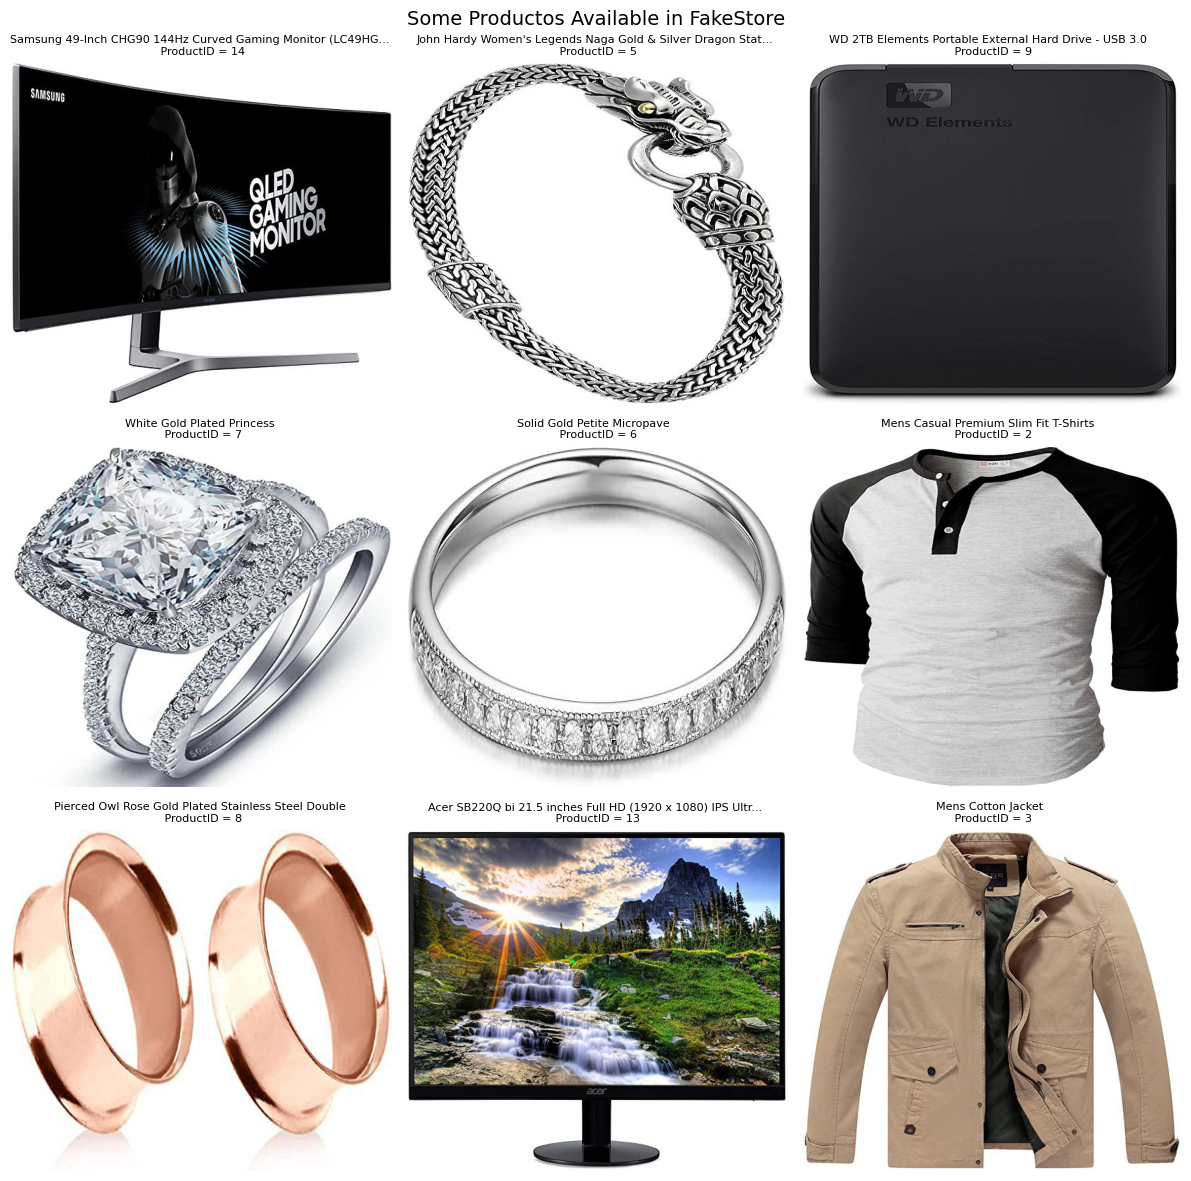

In [44]:
# VER EJERCICIO 2 DE LA SECCIÓN "3. Ejercicios caso práctico: "Ingesta de Datos con Python""
product_ids = []
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
for row, col in itertools.product(range(3), range(3)):
    repeat = True
    while repeat:
        random_product_id = np.random.choice(
            list(set(np.arange(1, len(products), 1)) ^ set(product_ids))
        )
        repeat = random_product_id in product_ids
        product_ids.append(random_product_id)

    product = products.loc[products["id"] == int(random_product_id)]
    title = product['title'].values[0]
    title = f"{title[:57]}..." if len(title) >= 60 else f"{title}"
    img = Image.open(os.path.join(IMGSET_PATH, f"{random_product_id}.jpg"))
    axes[row, col].imshow(img, aspect="auto")
    axes[row, col].set_title(f"{title} \n ProductID = {product['id'].values[0]}", fontsize=8)
    axes[row, col].axis('off')

plt.suptitle("Some Productos Available in FakeStore", fontsize=14)
plt.tight_layout()
plt.savefig(os.path.join(DATASET_PATH, "some_products_samples.png"), dpi=300)
plt.show()
    

Podemos también consultar la lista completa de usuarios registrados de Fake Store:

In [45]:
response = requests.get('https://fakestoreapi.com/users/')
users = response.json()
pprint(users)

[{'__v': 0,
  'address': {'city': 'kilcoole',
              'geolocation': {'lat': '-37.3159', 'long': '81.1496'},
              'number': 7682,
              'street': 'new road',
              'zipcode': '12926-3874'},
  'email': 'john@gmail.com',
  'id': 1,
  'name': {'firstname': 'john', 'lastname': 'doe'},
  'password': 'm38rmF$',
  'phone': '1-570-236-7033',
  'username': 'johnd'},
 {'__v': 0,
  'address': {'city': 'kilcoole',
              'geolocation': {'lat': '-37.3159', 'long': '81.1496'},
              'number': 7267,
              'street': 'Lovers Ln',
              'zipcode': '12926-3874'},
  'email': 'morrison@gmail.com',
  'id': 2,
  'name': {'firstname': 'david', 'lastname': 'morrison'},
  'password': '83r5^_',
  'phone': '1-570-236-7033',
  'username': 'mor_2314'},
 {'__v': 0,
  'address': {'city': 'Cullman',
              'geolocation': {'lat': '40.3467', 'long': '-30.1310'},
              'number': 86,
              'street': 'Frances Ct',
              'zipcode': 

In [46]:
users = pd.DataFrame.from_dict(users)
users

address  id               email  \
0  {'geolocation': {'lat': '-37.3159', 'long': '8...   1      john@gmail.com   
1  {'geolocation': {'lat': '-37.3159', 'long': '8...   2  morrison@gmail.com   
2  {'geolocation': {'lat': '40.3467', 'long': '-3...   3     kevin@gmail.com   
3  {'geolocation': {'lat': '50.3467', 'long': '-2...   4       don@gmail.com   
4  {'geolocation': {'lat': '40.3467', 'long': '-4...   5     derek@gmail.com   
5  {'geolocation': {'lat': '20.1677', 'long': '-1...   6   david_r@gmail.com   
6  {'geolocation': {'lat': '10.3456', 'long': '20...   7    miriam@gmail.com   
7  {'geolocation': {'lat': '50.3456', 'long': '10...   8   william@gmail.com   
8  {'geolocation': {'lat': '40.12456', 'long': '2...   9      kate@gmail.com   
9  {'geolocation': {'lat': '30.24788', 'long': '-...  10    jimmie@gmail.com   

    username      password                                             name  \
0      johnd       m38rmF$         {'firstname': 'john', 'lastname': 'doe'}   
1   mor_2314        83r5^_   {'firstname': 'david', 'lastname': 'morrison'}   
2  kevinryan     kev02937@       {'firstname': 'kevin', 'lastname': 'ryan'}   
3     donero        ewedon        {'firstname': 'don', 'lastname': 'romer'}   
4      derek      jklg*_56     {'firstname': 'derek', 'lastname': 'powell'}   
5    david_r      3478*#54    {'firstname': 'david', 'lastname': 'russell'}   
6     snyder      f238&@*$    {'firstname': 'miriam', 'lastname': 'snyder'}   
7    hopkins  William56$hj  {'firstname': 'william', 'lastname': 'hopkins'}   
8     kate_h      kfejk@*_        {'firstname': 'kate', 'lastname': 'hale'}   
9   jimmie_k     klein*#%*     {'firstname': 'jimmie', 'lastname': 'klein'}   

            phone  __v  
0  1-570-236-7033    0  
1  1-570-236-7033    0  
2  1-567-094-1345    0  
3  1-765-789-6734    0  
4  1-956-001-1945    0  
5  1-678-345-9856    0  
6  1-123-943-0563    0  
7  1-478-001-0890    0  
8  1-678-456-1934    0  
9  1-104-001-4567    0

E incluso, inscribirnos como un nuevo usuario en su base de datos:

In [47]:

url = 'https://fakestoreapi.com/users'
headers = {'Content-Type': 'application/json'}

data = {
    "email": "joe-fa-ver2023@gmail.com",
    "username": "joe-fa-ver",
    "password": "m38rmF$",
    "name": {
        "firstname": "Joseph",
        "lastname": "Vergel"
    },
    "address": {
        "city": "Bucaramanga",
        "street": "Calle 32 #32-45",
        "number": 3,
        "zipcode": "12926-3874",
        "geolocation": {
            "lat": "-6.32345",
            "long": "75.23455"
        }
    },
    "phone": "+57-318-704-2914"
}

response = requests.post(url, headers=headers, data=json.dumps(data))
if response.status_code == 200:
    json_data = response.json()
    print(response.status_code, json_data)
else:
    print("Error:", response.status_code)

200 {'id': 11}


<a id="ejercicios"></a>
## 3. Ejercicios caso práctico: "Ingesta de Datos con Python"

1. Bitcoin (BTC-USD) es la criptomoneda más popular en la actualidad y ha sufrido en los últimos meses varios desplomes abruptos. Para analizar el comportamiento de la criptodivisa, resuelva e implemente los siguientes pasos:
   - Consulte los datos para la criptomoneda Bitcoin a través del *ticker* BTC-USD, en el periodo de tiempo comprendido entre el primero de enero del 2020 y el 29 de marzo del 2023.
   - Grafique las series de tiempo de los precios mínimos y de los precios mas altos.
   - Visualice el comportamiento del precio de cierre entre el primero de enero del 2021 y el primero de mayo del 2022.
   - Calcule y visualice las bandas de Bollinger.
   - Implemente una función que calcule el promedio móvil (*Simple Moving Average*) del precio típico, a partir de los siguientes pasos
       1. Calcule el [precio típico](https://en.wikipedia.org/wiki/Typical_price#:~:text=In%20financial%20trading%2C%20typical%20price,prices%20for%20a%20given%20period.) a partir de la siguiente formula:
      
           $$typical\_price = \frac{high + low + close}{3}.$$
       2. Tome el precio típico y aplique un promedio móvil con una venta de veinte periodos y un valor del mínimo de periodos igual a uno: `pd.Series.rolling(window=window, min_periods=min_periods).mean()`
           
       3. Finalmente, retorne el resultado y concatenelo al *dataframe* original.
   - Grafique el precio de cierre y el promedio móvil del precio típico (calculado en el punto anterior) en el mismo gráfico, para su comparación.


**NOTA:** A manera de comprobación, sus resultados deben verse similares a los siguientes gráficos:

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/LGUMyEF.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/CpLgFHh.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/cDyTiQJ.png" alt="python-interpreter">
  </a><br>
</p><br>

<p align="center">
  <a target="_blank">
    <img width="800px" src="https://i.imgur.com/O9cWMYx.png" alt="python-interpreter">
  </a><br>
</p><br>

2. Utilice comentarios de `Python` (`#`) para explicar cada linea de codigo de la celda marcada con la anotación ***VER EJERCICIO 2 DE LA SECCIÓN "3. Ejercicios caso práctico: "Ingesta de Datos con Python"***.


<a id='referencias'></a>
## Referencias

[1] Matthes, E. (2019). *Python crash course: A hands-on, project-based introduction to programming.* no starch press.

[2] Downey, A. (2015). *Think python: How to Think Like a Computer Scientist.* "O'Reilly Media, Inc.". 

[3] Johansson, R. *Numerical Python: Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib*. Apress, Berkeley, 2019.

<a id='contribuir'></a>
## Contribuir

<p>Para correcciones, <i>bugs</i> o sugerencias, por favor escribe a <a href="mailto:joseph@guane.com.co">info@joefaver.dev</a> o directamente en el repositorio.</p>